# Wearable Data: Motion Recognition

## Plan: 11/8

- Run Supervised Learning with cross-validation (test/training data split) on data points to predict their motion classes,
then calculate the AUC against their true classes.
- Analyze the results from each method:
    - KNN
    - Decision Tree
    - Bayesian
    - Neural Networks(?)

    
- Run Unsupervised Clustering and see if the clusters are interpretable.
- Compare the interpreted cluster results with their true class and see if they work better or worse than the supervised ones:
    - Hierachical Clustering
    - K-Means

## 11/15

## Read Data

In [1]:
import pandas as pd
wearable_data = pd.read_csv("dataset-har-PUC-Rio-ugulino.csv",sep=";", header = 0, decimal = ",")

In [2]:
wearable_data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


In [3]:
categorical_columns = ["gender"]
categorical_data = pd.DataFrame()
wearable_data["gender"] = wearable_data["gender"].astype('category')
wearable_data[categorical_columns] = wearable_data[categorical_columns].apply(lambda x: x.cat.codes)
wearable_data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,1,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,1,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,1,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,1,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,1,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


In [4]:
categorical_columns = ["class"]
categorical_data = pd.DataFrame()
onehot_encoded_data = pd.get_dummies(wearable_data[["class"]])
categorical_data = pd.concat([categorical_data, onehot_encoded_data], axis = 1)
wearable_data = pd.concat([wearable_data.ix[:,:-1], categorical_data],axis=1)
wearable_data[0:5]

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,...,y3,z3,x4,y4,z4,class_sitting,class_sittingdown,class_standing,class_standingup,class_walking
0,debora,1,46,1.62,75,28.6,-3,92,-63,-23,...,104,-92,-150,-103,-147,1,0,0,0,0
1,debora,1,46,1.62,75,28.6,-3,94,-64,-21,...,104,-90,-149,-104,-145,1,0,0,0,0
2,debora,1,46,1.62,75,28.6,-1,97,-61,-12,...,104,-90,-151,-104,-144,1,0,0,0,0
3,debora,1,46,1.62,75,28.6,-2,96,-57,-15,...,104,-89,-153,-103,-142,1,0,0,0,0
4,debora,1,46,1.62,75,28.6,-1,96,-61,-13,...,104,-89,-153,-104,-143,1,0,0,0,0


In [5]:
features = wearable_data[wearable_data.columns.values[1:-5]].as_matrix()
labels = wearable_data[wearable_data.columns.values[-5:]].as_matrix()
print(features[0:2, :])
print()
print(labels[0:5, :])

[[   1.     46.      1.62   75.     28.6    -3.     92.    -63.    -23.
    18.    -19.      5.    104.    -92.   -150.   -103.   -147.  ]
 [   1.     46.      1.62   75.     28.6    -3.     94.    -64.    -21.
    18.    -18.    -14.    104.    -90.   -149.   -104.   -145.  ]]

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


## Train/Test split

In [7]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33,random_state=42)

/Users/hazelque/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## KNN

In [8]:
# KNN for Sitting

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix

labels_sitting = wearable_data["class_sitting"].as_matrix()

sitting_features_train, sitting_features_test, sitting_labels_train, sitting_labels_test = train_test_split(features, labels_sitting, test_size=0.33, random_state=42)

for i in range(1, 21, 2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(sitting_features_train, sitting_labels_train)
    sitting_predictions_test = neigh.predict(sitting_features_test)

    print ("Confusion Matrix:")
    print (confusion_matrix(sitting_labels_test, sitting_predictions_test))
    print ("Accuracy: " + str(metrics.accuracy_score(sitting_labels_test, sitting_predictions_test)))

Confusion Matrix:
[[38056    13]
 [    1 16589]]
Accuracy: 0.999743866518
Confusion Matrix:
[[38057    12]
 [    3 16587]]
Accuracy: 0.999725571269
Confusion Matrix:
[[38058    11]
 [    4 16586]]
Accuracy: 0.999725571269
Confusion Matrix:
[[38057    12]
 [   10 16580]]
Accuracy: 0.999597504528
Confusion Matrix:
[[38058    11]
 [   12 16578]]
Accuracy: 0.999579209279
Confusion Matrix:
[[38057    12]
 [   16 16574]]
Accuracy: 0.999487733036
Confusion Matrix:
[[38058    11]
 [   17 16573]]
Accuracy: 0.999487733036
Confusion Matrix:
[[38057    12]
 [   17 16573]]
Accuracy: 0.999469437787
Confusion Matrix:
[[38057    12]
 [   19 16571]]
Accuracy: 0.99943284729
Confusion Matrix:
[[38055    14]
 [   24 16566]]
Accuracy: 0.999304780548


In [9]:
from sklearn import cross_validation

neigh = KNeighborsClassifier(n_neighbors=5)
    #cv_precision = cross_validation.cross_val_score(neigh, features, labels_sitting, scoring='precision', cv=3)
    #cv_recall =  cross_validation.cross_val_score(neigh, features, labels_sitting, scoring='recall', cv=3)
cv_accuracy = cross_validation.cross_val_score(neigh, features, labels_sitting, scoring='accuracy', cv=3)
    #print ("Average Precision:" + str(sum(cv_precision)/len(cv_precision)))
    #print ("Average Recall: " + str(sum(cv_recall)/len(cv_recall)))
print ("Average Accuracy: " + str(sum(cv_accuracy)/len(cv_accuracy)))

Average Accuracy: 0.863161326547


In [10]:
# KNN for sitting down
neigh = KNeighborsClassifier(n_neighbors=10)
labels_sd = wearable_data["class_sittingdown"].as_matrix()

sd_features_train, sd_features_test, sd_labels_train, sd_labels_test = train_test_split(features, labels_sd, test_size=0.33, random_state=42)

neigh.fit(sd_features_train, sd_labels_train)
sd_predictions_test = neigh.predict(sd_features_test)

print ("Confusion Matrix:")
print (confusion_matrix(sd_labels_test, sd_predictions_test))
print ("Accuracy: " + str(metrics.accuracy_score(sd_labels_test, sd_predictions_test)))

Confusion Matrix:
[[50648   102]
 [   55  3854]]
Accuracy: 0.99712764595


In [11]:
neigh = KNeighborsClassifier(n_neighbors=10)

neigh.fit(features_train, labels_train)
predictions_test = neigh.predict(features_test)

print ("Accuracy: " + str(metrics.accuracy_score(labels_test, predictions_test)))

Accuracy: 0.990523061161


In [12]:
neigh = KNeighborsClassifier(n_neighbors=10)
cv_accuracy = cross_validation.cross_val_score(neigh, features, labels_sd, scoring='accuracy', cv=10)
print ("Average Accuracy: " +str(sum(cv_accuracy)/len(cv_accuracy)))

Average Accuracy: 0.867129237417


In [13]:
# KNN for standing
neigh = KNeighborsClassifier(n_neighbors=10)
labels_st = wearable_data["class_standing"].as_matrix()

st_features_train, st_features_test, st_labels_train, st_labels_test = train_test_split(features, labels_st, test_size=0.33, random_state=42)

neigh.fit(st_features_train, st_labels_train)
st_predictions_test = neigh.predict(st_features_test)

print ("Confusion Matrix:")
print (confusion_matrix(st_labels_test, st_predictions_test))
print ("Accuracy: " + str(metrics.accuracy_score(st_labels_test, st_predictions_test)))

Confusion Matrix:
[[38881   157]
 [   50 15571]]
Accuracy: 0.996212883514


In [14]:
# KNN for standingup
neigh = KNeighborsClassifier(n_neighbors=10)
labels_su = wearable_data["class_standingup"].as_matrix()

su_features_train, su_features_test, su_labels_train, su_labels_test = train_test_split(features, labels_su, test_size=0.33, random_state=42)

neigh.fit(su_features_train, su_labels_train)
su_predictions_test = neigh.predict(su_features_test)

print ("Confusion Matrix:")
print (confusion_matrix(su_labels_test, su_predictions_test))
print ("Accuracy: " + str(metrics.accuracy_score(su_labels_test, su_predictions_test)))

Confusion Matrix:
[[50476    66]
 [  162  3955]]
Accuracy: 0.995828683291


In [15]:
# KNN for walking
neigh = KNeighborsClassifier(n_neighbors=10)
labels_wa = wearable_data["class_walking"].as_matrix()

wa_features_train, wa_features_test, wa_labels_train, wa_labels_test = train_test_split(features, labels_wa, test_size=0.33, random_state=42)

neigh.fit(wa_features_train, wa_labels_train)
wa_predictions_test = neigh.predict(wa_features_test)

print ("Confusion Matrix:")
print (confusion_matrix(wa_labels_test, wa_predictions_test))
print ("Accuracy: " + str(metrics.accuracy_score(wa_labels_test, wa_predictions_test)))

Confusion Matrix:
[[40199    38]
 [  235 14187]]
Accuracy: 0.995005397098


## PCA

In [19]:
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

pca_f1_score = []
pca_precision = []
pca_recall = []

for i in range(1, 18):
    pca = PCA(n_components = i)
    pca.fit(features)
    pca_features = pca.transform(features)
    pca_features_train, pca_features_test, pca_labels_train, pca_labels_test = train_test_split(pca_features, labels, test_size=0.33,random_state=42)
    pca_dt = tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=5)
    pca_dt.fit(pca_features_train,pca_labels_train)
    pca_pred_dt = pca_dt.predict(pca_features_test)
    pca_f1_score.append(f1_score(pca_labels_test, pca_pred_dt, average="macro"))
    pca_precision.append(precision_score(pca_labels_test, pca_pred_dt, average="macro"))
    pca_recall.append(recall_score(pca_labels_test, pca_pred_dt, average="macro"))    

In [20]:
print(pca_f1_score)
print(pca_precision)
print(pca_recall)

[0.35860875545674564, 0.66456670700886067, 0.68852093126235692, 0.67902574984111697, 0.68810811689203566, 0.69797736570923341, 0.7964665858193537, 0.79550316845174585, 0.78505091148966266, 0.79090524278937235, 0.78742866239197618, 0.80377132190819633, 0.79633667124490581, 0.80109275200669905, 0.75710369247723563, 0.75712842345010978, 0.75721235391909314]
[0.61981551784258859, 0.77057035020959996, 0.78270461440005334, 0.82378055080662127, 0.86680246069404365, 0.87717777276542319, 0.81586962609314462, 0.81870880206356045, 0.81955645107398123, 0.81798745862407041, 0.80846308516833643, 0.82444976790181068, 0.82705520843091951, 0.82982943038600199, 0.86289379901680652, 0.86288498768168154, 0.8628625590333312]
[0.3167737142300992, 0.62938499446590768, 0.66517311739215379, 0.63267553619780625, 0.62702010909738981, 0.63496224860173567, 0.78230564008493597, 0.77684747022996137, 0.75861356959440052, 0.76945977357383699, 0.77176897489290064, 0.78695210532408455, 0.77529854454394298, 0.78154698637

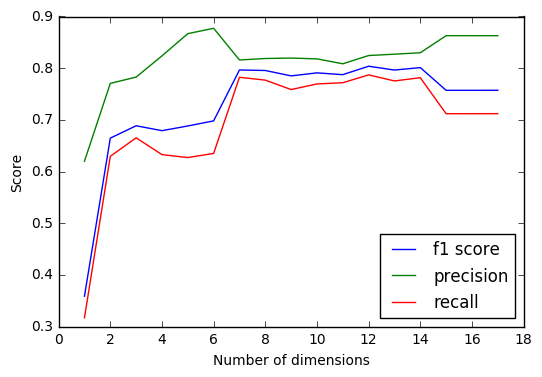

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(1, 18)

plt.plot(x, pca_f1_score)
plt.plot(x, pca_precision)
plt.plot(x, pca_recall)
plt.legend(['f1 score', 'precision', 'recall'], loc='lower right')
plt.xlabel("Number of dimensions")
plt.ylabel("Score")
plt.show()

## K-Means

In [23]:
# k-means for sitting
from sklearn.cluster import KMeans

accuracy_array = []
i_values = range(2,10)

for i in i_values:
    k_means = KMeans(n_clusters = i, random_state = 1)
    sitting_label = wearable_data[wearable_data.columns.values[-5]].as_matrix()
    X, y = features, sitting_label
    k_means.fit(X)
    y_pred = k_means.predict(X)

    # we want to obtain the confusion matrix for the k-means
    # but we are only concerned with the first two rows because we are only looking at 0/1 labels for a class at a time
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(sitting_label, y_pred)
    results = cm[:2, :]
    print(results)
    print()

    # we combine the clusters with more one labels than zero labels

    TP = 0
    FN = 0
    FP = 0
    TN = 0

    for x in range (0, i):
        # more 1s than 0s - class labeled as 1
        if results[1,x] > results[0,x]:
            TP += results[1,x]
            FP += results[0,x]
        else:
            TN += results[0,x]
            FN += results[1,x]

    accuracy = (TP + TN) / (TP + FN + FP + TN)
    accuracy_array.append(accuracy)

print(accuracy_array)

[[88423 26579]
 [41251  9380]]

[[22665 88200  4137]
 [    0 41246  9385]]

[[ 6886 22665 81316  4135]
 [41234     0    12  9385]]

[[81357 22595  3942  6248   860]
 [   12     0  9382 41209    28]]

[[ 6735 22596   859 80031   840  3941]
 [26195     0    28    12 15014  9382]]

[[  833 21981   506 79989   858  4111  6724]
 [15014     0  5573    12    28  3809 26195]]

[[  210 21981 79543   506   856   840  6955  4111]
 [ 5686     0    12  5573    28 14963 20560  3809]]

[[76949 21981  4111  6949   501   856   123   811  2721]
 [   12     0  3807 20556  5575    28  5693 14960     0]]

[0.69431816123598555, 0.72600266855034923, 0.93338887782024116, 0.93823694553621562, 0.93023129448841713, 0.92808196434285439, 0.92537718932821356, 0.92615601963376859]


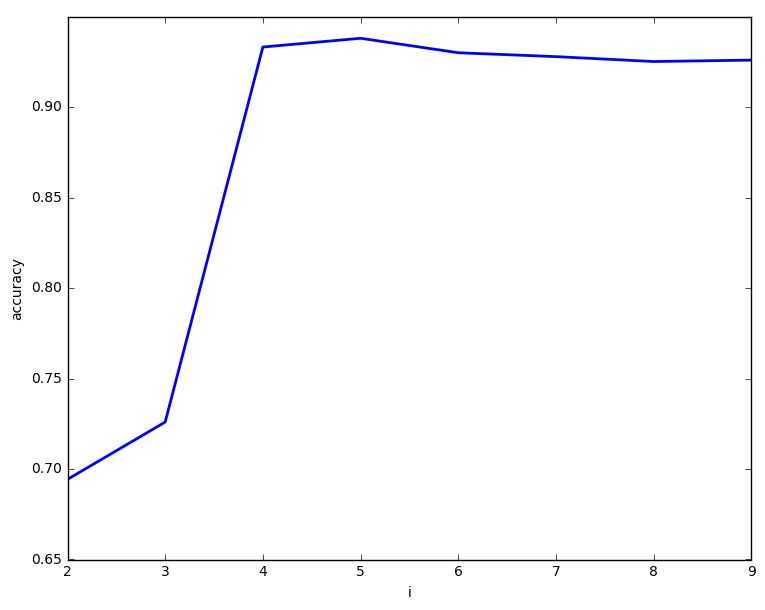

In [24]:
fig, axes = plt.subplots(figsize=(30,7))
plt.subplot(1,3,3)
plt.plot(i_values, accuracy_array, linewidth=2.0)
plt.xlabel("i")
plt.ylabel("accuracy")


In [25]:
# k-means for sittingdown
from sklearn.cluster import KMeans

accuracy_array = []
i_values = range(2,10)

for i in i_values:
    k_means = KMeans(n_clusters = i, random_state = 1)
    sd_label = wearable_data[wearable_data.columns.values[-4]].as_matrix()
    X, y = features, sd_label
    k_means.fit(X)
    y_pred = k_means.predict(X)

    # we want to obtain the confusion matrix for the k-means
    # but we are only concerned with the first two rows because we are only looking at 0/1 labels for a class at a time
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(sd_label, y_pred)
    results = cm[:2, :]
    print(results)
    print()

    # we combine the clusters with more one labels than zero labels

    TP = 0
    FN = 0
    FP = 0
    TN = 0

    for x in range (0, i):
        # more 1s than 0s - class labeled as 1
        if results[1,x] > results[0,x]:
            TP += results[1,x]
            FP += results[0,x]
        else:
            TN += results[0,x]
            FN += results[1,x]

    accuracy = (TP + TN) / (TP + FN + FP + TN)
    accuracy_array.append(accuracy)

print(accuracy_array)

[[121033  32773]
 [  8641   3186]]

[[ 21410 120814  11582]
 [  1255   8632   1940]]

[[45189 21410 75627 11580]
 [ 2931  1255  5701  1940]]

[[75635 21339 11385 44563   884]
 [ 5734  1256  1939  2894     4]]

[[29347 21340   883 75003 15849 11384]
 [ 3583  1256     4  5040     5  1939]]

[[15844 20854  6061 74956   882  5868 29341]
 [    3  1127    18  5045     4  2052  3578]]

[[ 5877 20854 74630  6061   880 15799 23837  5868]
 [   19  1127  4925    18     4     4  3678  2052]]

[[72027 20854  5866 23839  6058   880  5794 15767  2721]
 [ 4934  1127  2052  3666    18     4    22     4     0]]

[0.9285951471023286, 0.9285951471023286, 0.9285951471023286, 0.9285951471023286, 0.9285951471023286, 0.9285951471023286, 0.9285951471023286, 0.9285951471023286]


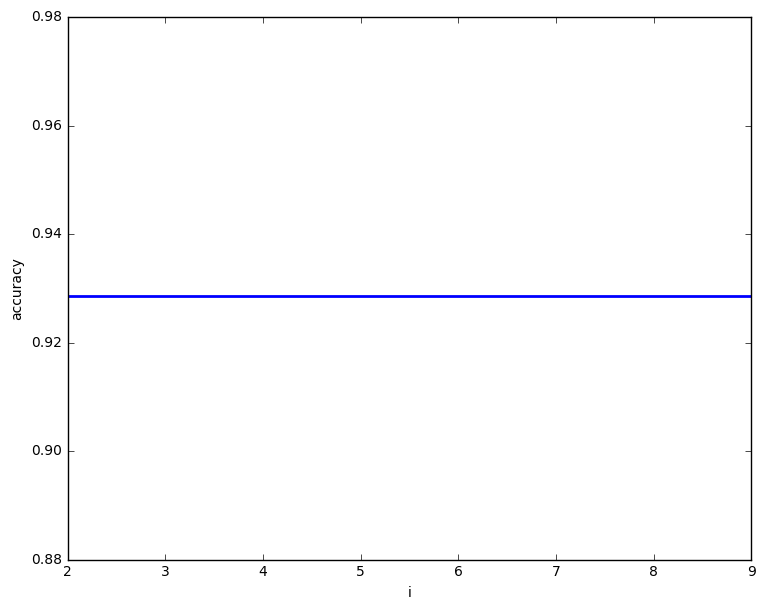

In [26]:
fig, axes = plt.subplots(figsize=(30,7))
plt.subplot(1,3,3)
plt.plot(i_values, accuracy_array, linewidth=2.0)
plt.xlabel("i")
plt.ylabel("accuracy")

## 3-Means 

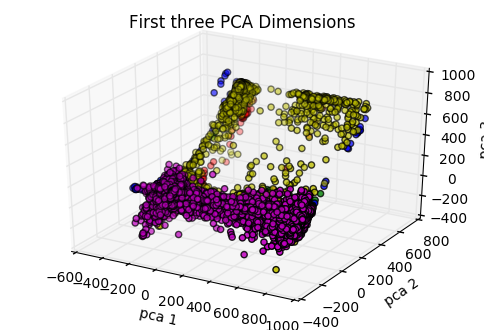

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colors = ['r','g','b','y','m']

pca = PCA(n_components = 3)
pca.fit(features)
pca_features = pca.transform(features)

pca_k_means = KMeans(n_clusters = 3, random_state = 1)
pca_k_means.fit(pca_features)
pca_y_pred = pca_k_means.predict(pca_features)

pred = []
length = range(len(labels))

for i in length:
    if labels[i][0] == 1:
        pred.append(colors[0])
    elif labels[i][1] == 1:
        pred.append(colors[1])
    elif labels[i][2] == 1:
        pred.append(colors[2])
    elif labels[i][3] == 1:
        pred.append(colors[3])
    else:
        pred.append(colors[4])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2], c=pred)

ax.set_xlabel('pca 1')
ax.set_ylabel('pca 2')
ax.set_zlabel('pca 3')
ax.set_title('First three PCA Dimensions')
plt.show()